In [ ]:
# we will use the simple moving  average crossover strategy & pyhton to buy/sell signals

In [6]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
from datetime import datetime

In [8]:
#request data

stock = 'BA'
startdate = '2021-08-10'
enddate = '2022-08-11'


df = yf.download(stock,start=startdate, end=enddate,progress=False)
ba = yf.download(stock,start=startdate, end=enddate,progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-09,229.000000,233.570007,226.889999,232.270004,232.270004,8358600
2021-08-10,231.970001,236.850006,231.619995,235.779999,235.779999,9603500
2021-08-11,236.610001,239.589996,234.580002,239.490005,239.490005,9664000
2021-08-12,240.000000,241.149994,236.509995,238.179993,238.179993,6810000
2021-08-13,238.009995,239.690002,234.279999,234.460007,234.460007,6390300
...,...,...,...,...,...,...
2022-08-04,165.770004,168.119995,164.410004,166.500000,166.500000,5039600
2022-08-05,164.399994,167.070007,163.929993,165.039993,165.039993,4699700
2022-08-08,166.410004,171.089996,164.710007,165.889999,165.889999,11293200


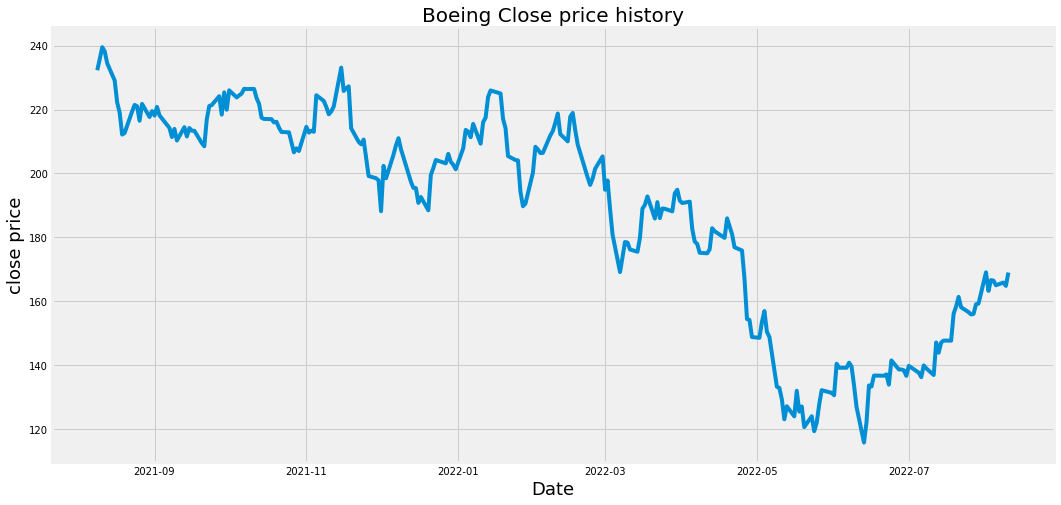

In [9]:
#show the close price

plt.figure(figsize=(16,8))
plt.title('Boeing Close price history',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
    plt.ylabel('close price',fontsize=18)
plt.show()

In [10]:
# create a function to calc the SMA

def SMA(data,period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [23]:
# create two new cols to store 20 day and 50 day SMA

df['SMA20'] = SMA(df,5)
df['SMA50'] = SMA(df,20)

In [24]:
#get buy and sell signals

df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1,0)  # if condition is true returns 1 else 0
df['Position'] = df['Signal'].diff() # susbtract furthest day price with current day price ,ex: 1-0 or 1-1 or 0-0 or 0-1
                                        # the result get us the buy or sell signals
    
df['Buy'] = np.where(df['Position'] == 1, df['Close'],np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'],np.NAN)



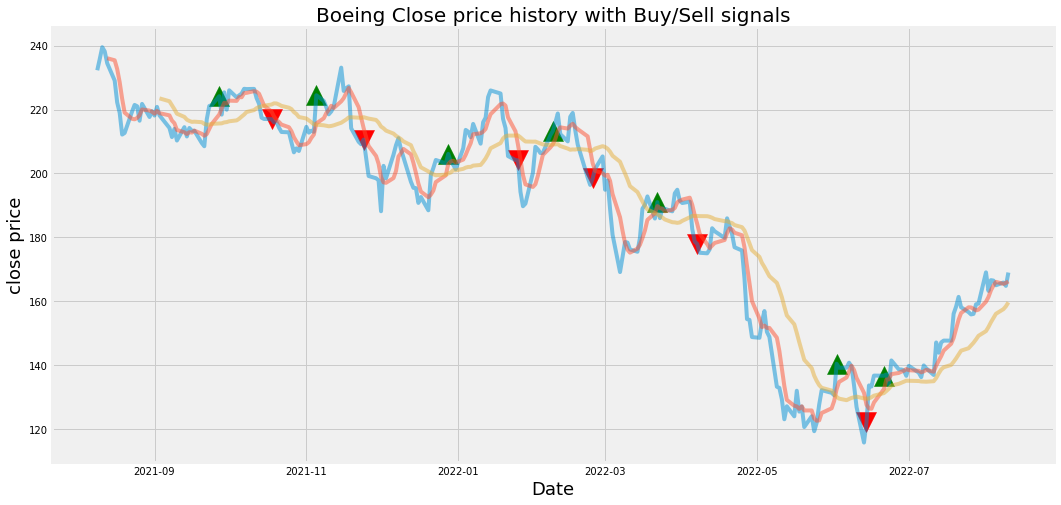

In [25]:
#show the close price with the SMAs and buy/sell signals


plt.figure(figsize=(16,8))
plt.title('Boeing Close price history with Buy/Sell signals',fontsize=20)
plt.plot(df['Close'],alpha = 0.5, label='Close')
plt.plot(df['SMA20'],alpha = 0.5, label='SMA20')
plt.plot(df['SMA50'],alpha = 0.5, label='SMA50')
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker="^", color='green',s=400)
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker="v", color='red',s=400)
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()